# Display origin of prototypes

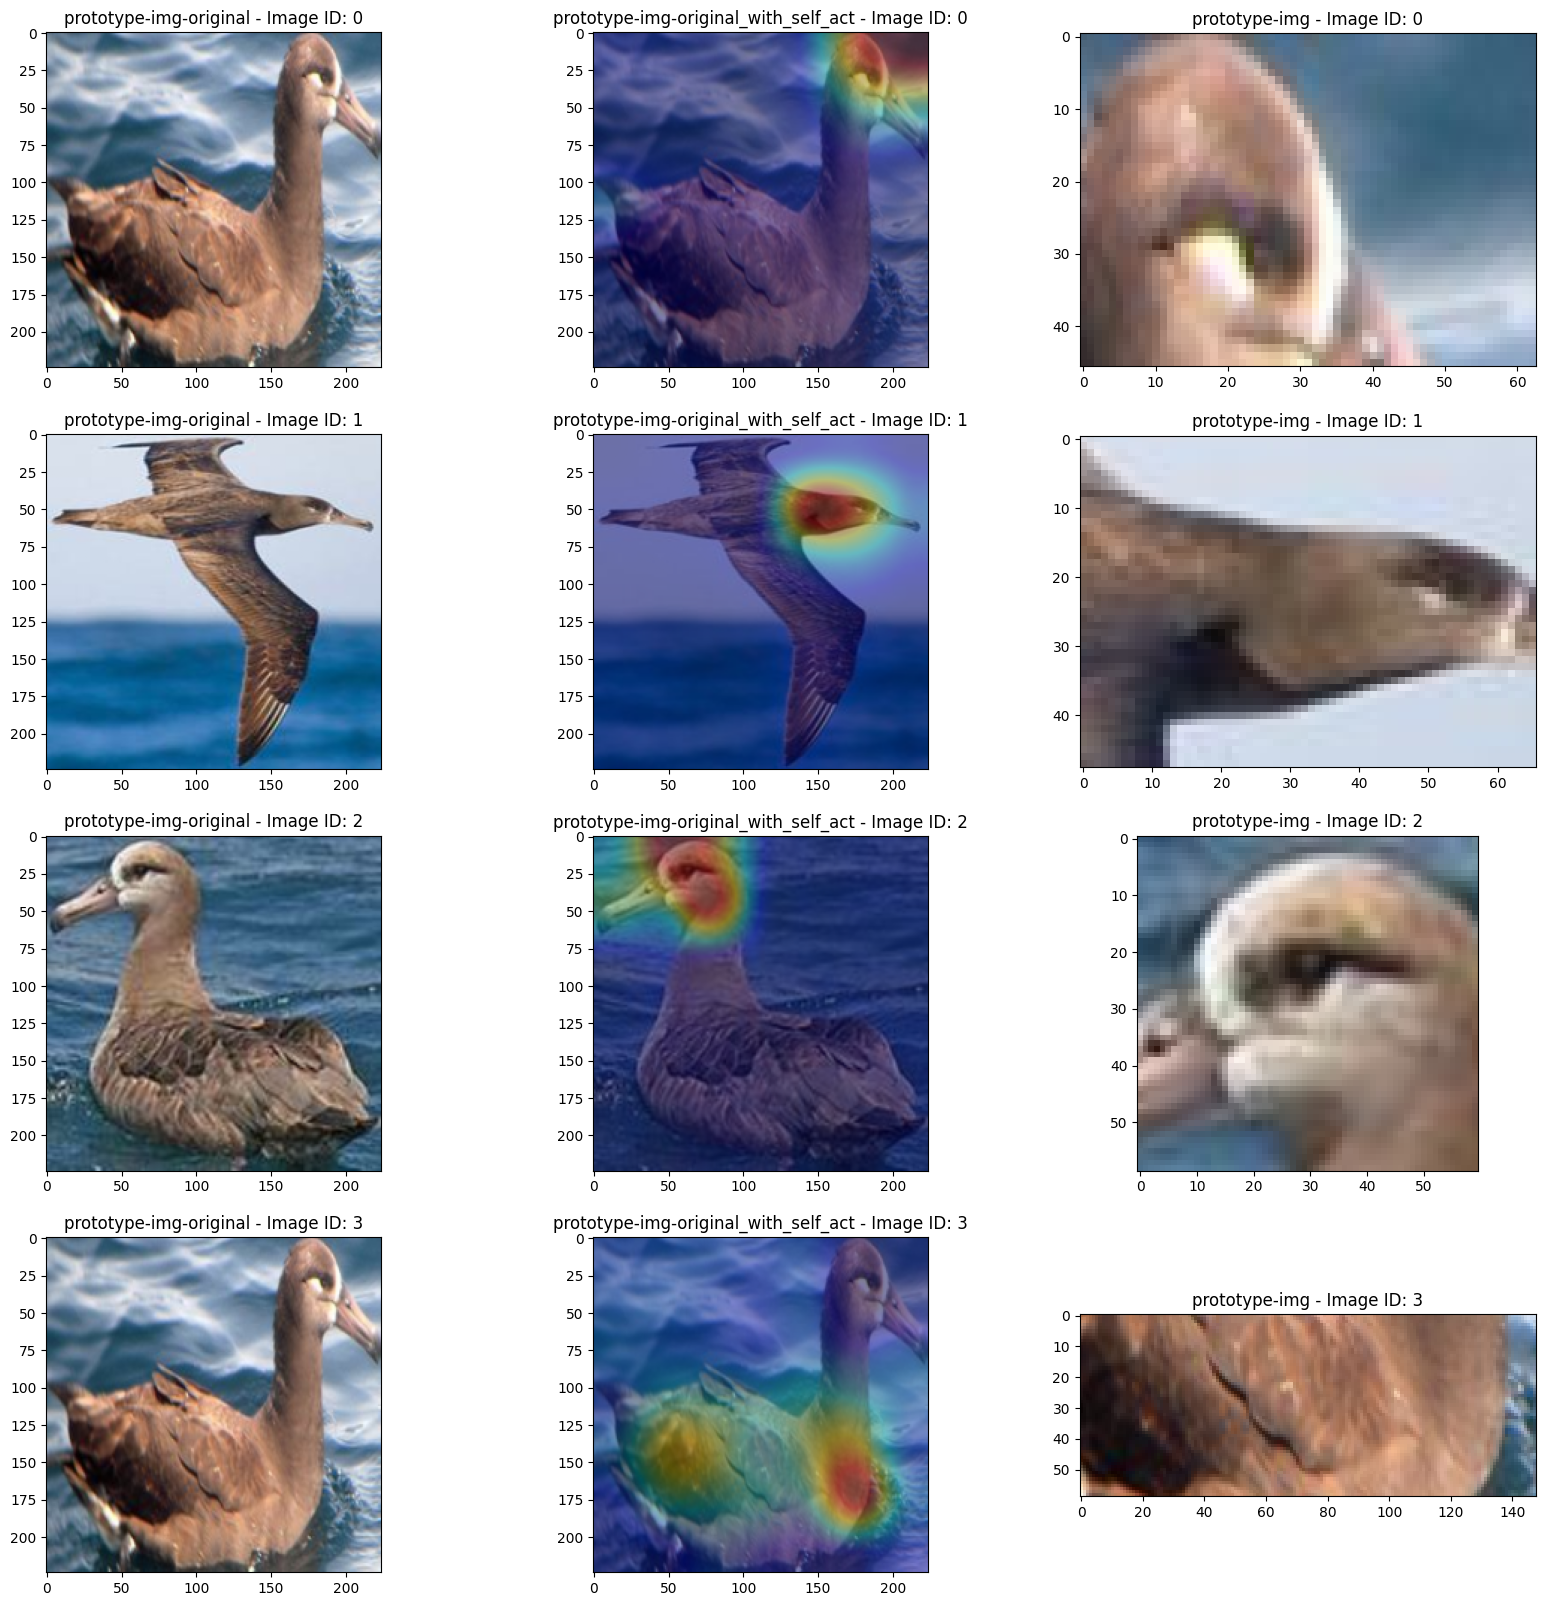

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
os.chdir("../Prototype Analysis")
a = np.loadtxt("../Data/CUB_200_2011/CUB_200_2011/train_test_split.txt",delimiter=" ")

img_types = ["prototype-img-original","prototype-img-original_with_self_act","prototype-img"]


###########
prototype_ids = [0,1,2,3]
###########

fig, axs = plt.subplots(len(prototype_ids),3,figsize=(20,20))

for j,id in enumerate(prototype_ids):
    for i, img_type in enumerate(img_types):
        a = "img/epoch-20/" +img_type + str(id) + ".png"
        im = plt.imread(a)
        axs[j,i].imshow(im)
        axs[j,i].set_title(img_type + f" - Image ID: {id}")




# Analyze .npy files

In [3]:
base = "img/epoch-20/"
f1 = base + "bb-receptive_field20.npy" # --> Activation pattern
f2 = base + "bb20.npy" # --> Activation pattern
f3_base = base + "prototype-self-act" # --> Activation pattern in latent space
f4 = "prune_info.npy"

rec_filed = np.load(f1)
print(rec_filed.shape)

bb20 = np.load(f2)
print(bb20.shape)
print(bb20[:10,:])

self_act = np.load(f3_base + "4" + ".npy") 
print(self_act.shape) 

prune_info = np.load(f4)
print(prune_info.shape)

(1023, 6)
(1023, 6)
[[  1   0  46 161 224   0]
 [ 27  27  75 127 193   0]
 [ 20   0  59  33  93   0]
 [  1 132 191  47 195   0]
 [ 20   0  53  28  84   0]
 [ 37   0  58 127 184   1]
 [ 34  29  79 102 167   1]
 [ 34  36  92  82 182   1]
 [ 32   0  51 133 192   1]
 [ 46   0  59 108 157   1]]
(7, 7)
(977, 2)


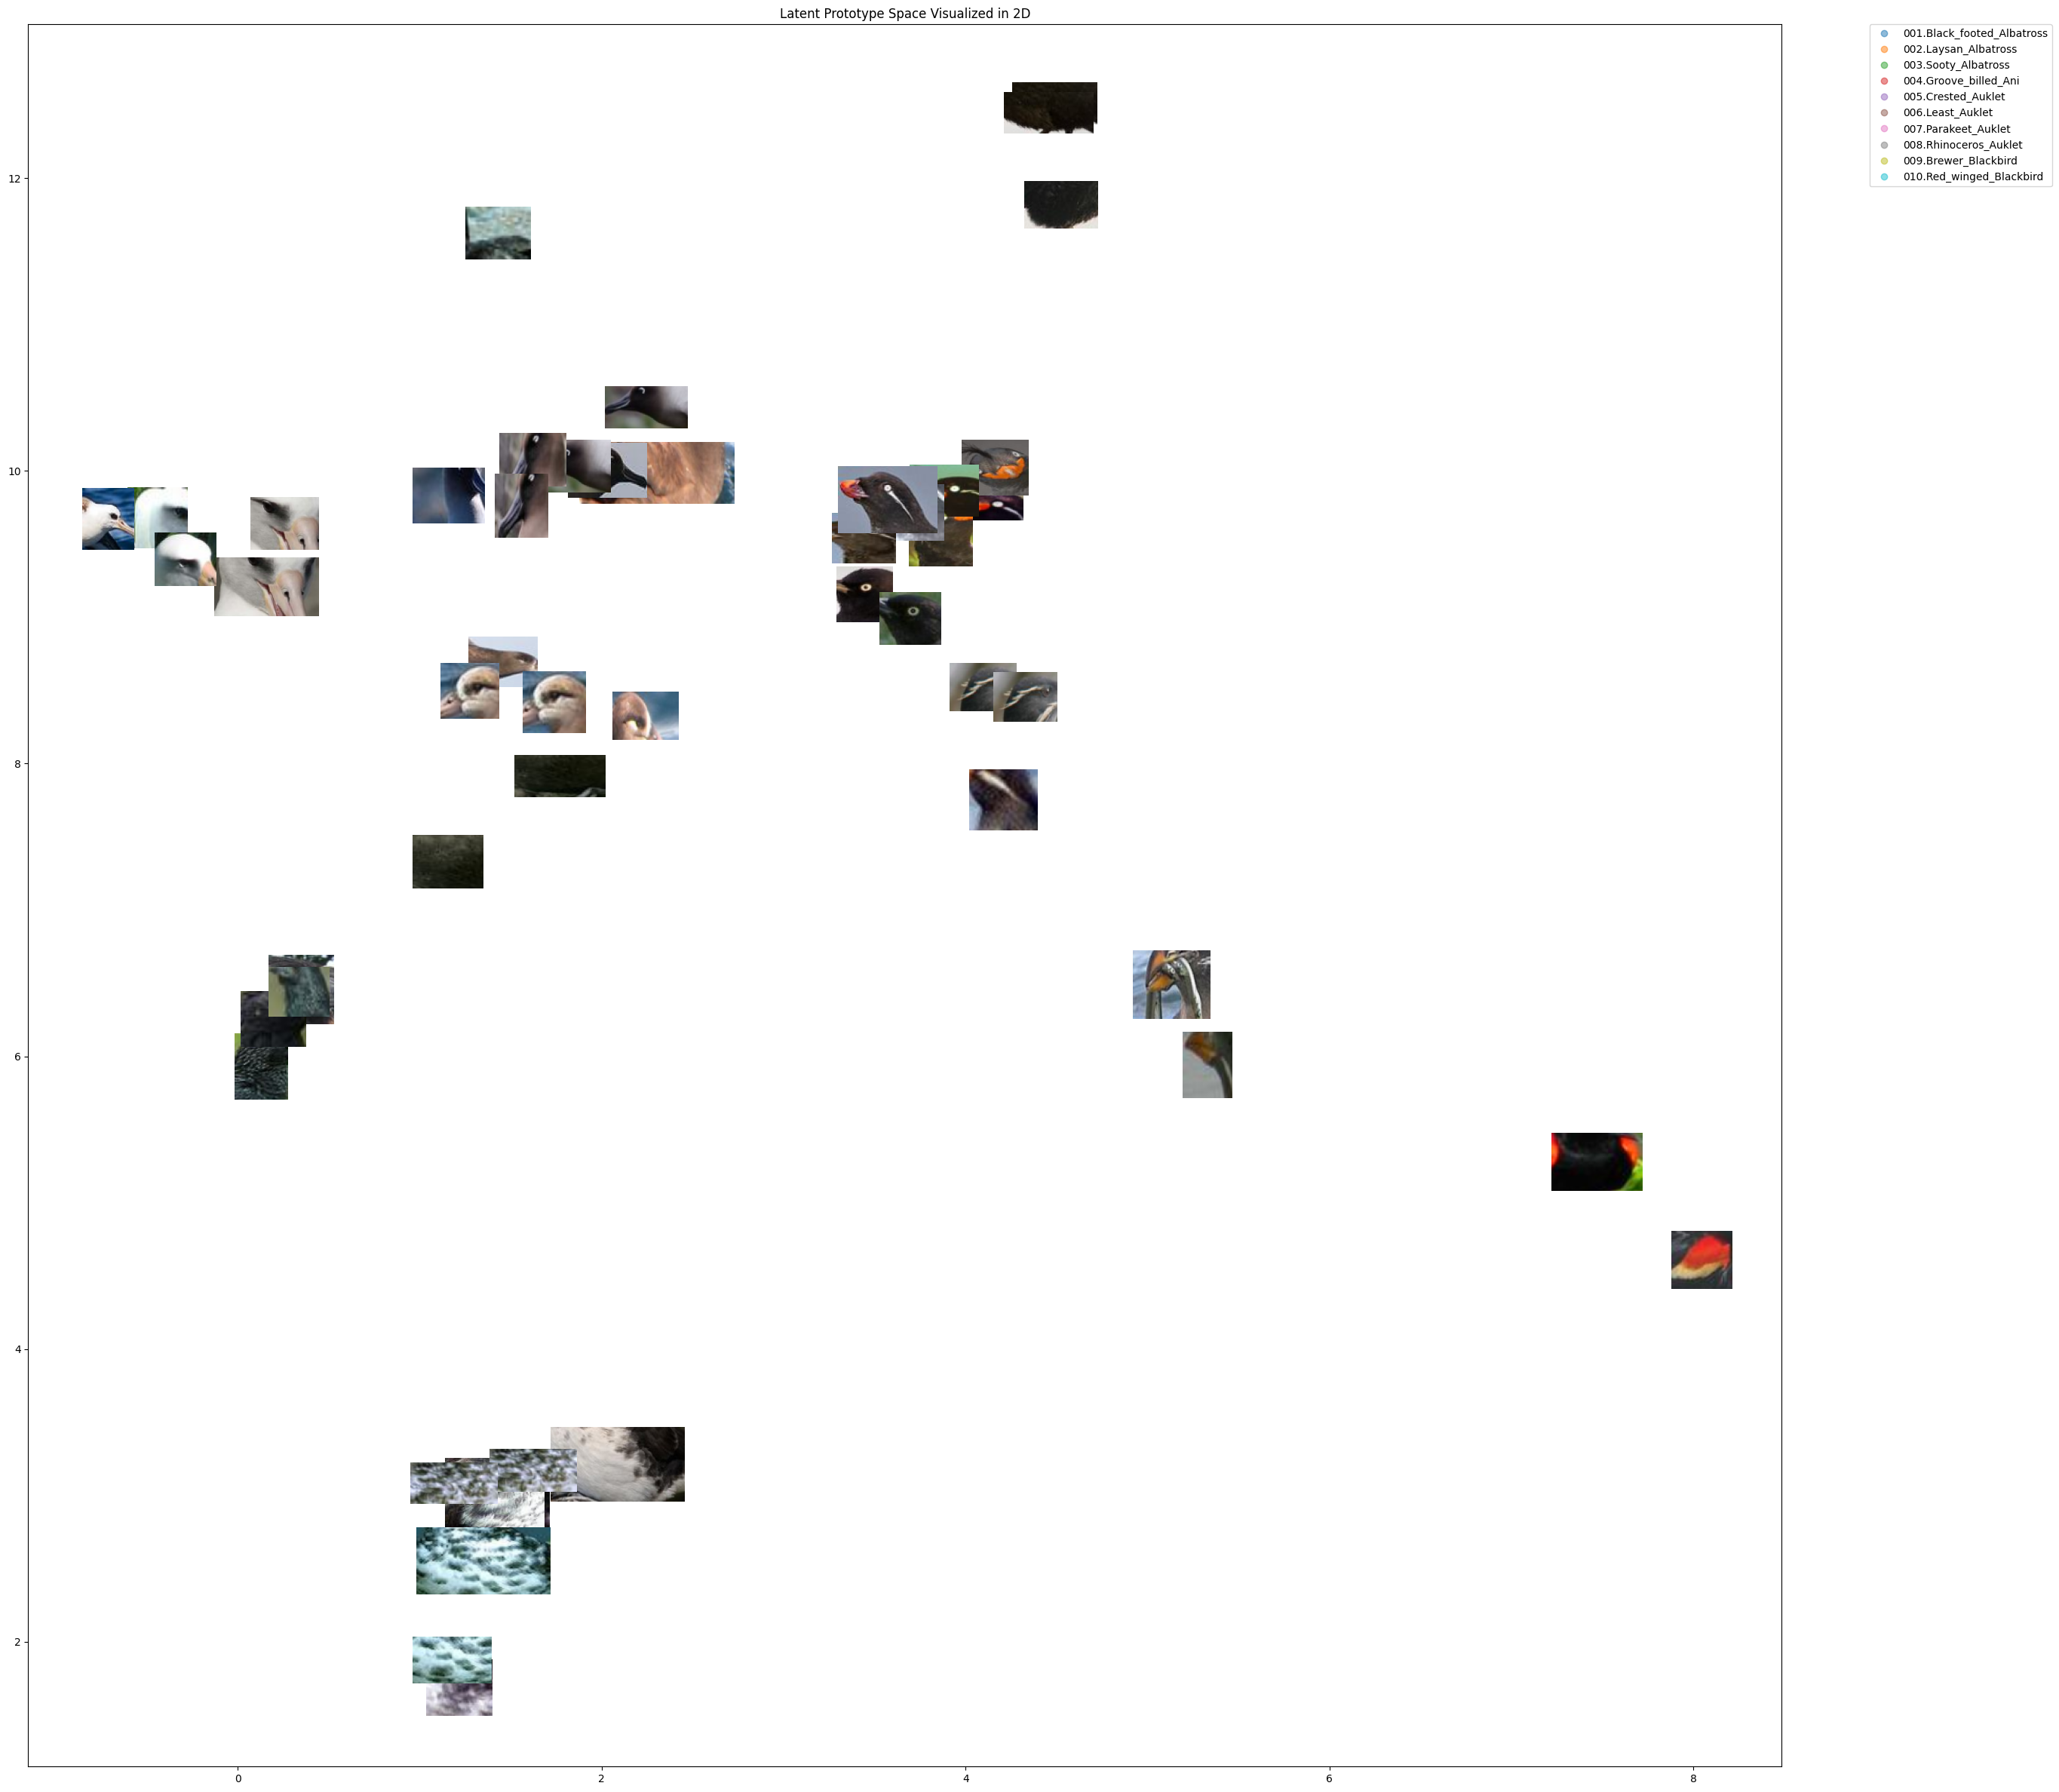

In [38]:
import torch
import os
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

# * get class info and prepare coloring
path_to_class_info = "../Data/CUB_200_2011/CUB_200_2011/classes.txt"
class_names = pd.read_table(path_to_class_info, delimiter=" ",header=None).iloc[:,-1].to_list()
colors = bb20[:50,-1]
labels = [class_names[el] for el in list(set(colors))]

# * load prototypes
os.chdir("../ProtoPNet")
path_to_model = "../Prototype Analysis/20_19_58prune0.9873.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).numpy()
os.chdir("../Prototype Analysis")

# * initialize UMAP and get 2d embedding
reducer = umap.UMAP(n_neighbors=50,metric="euclidean",min_dist=0.9)
embedding = reducer.fit_transform(prototypes)
xs = embedding[:50,0]
ys = embedding[:50,1]

# * Plot prototypes in 2d
fig, ax = plt.subplots(figsize=(30,30))
ax.set_title("Latent Prototype Space Visualized in 2D")
scatter = ax.scatter(xs, ys,c=colors,cmap="tab10",alpha=0.5)
handles, _ = scatter.legend_elements()
legend = plt.legend(handles,labels,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

# * Plot prototypes with corresponding images
artists = []
zoom = 1
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-20/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax.add_artist(ab))
    # rect = patches.Rectangle((x0, y0), width, height, linewidth=3, edgecolor='r', facecolor='none')
    # ax.add_patch(rect)
ax.update_datalim(np.column_stack([xs, ys]))
ax.autoscale()




# REPORT

[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  4  4  4  4
  4  4  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  9
  9  9  9  9 10 10 10 10 10 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17
 17 17 17 18 18 18 18 18 18 18 18 19 19 19 19 19 19]
(1023, 128)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Text(0, 0.5, 'UMAP 2')

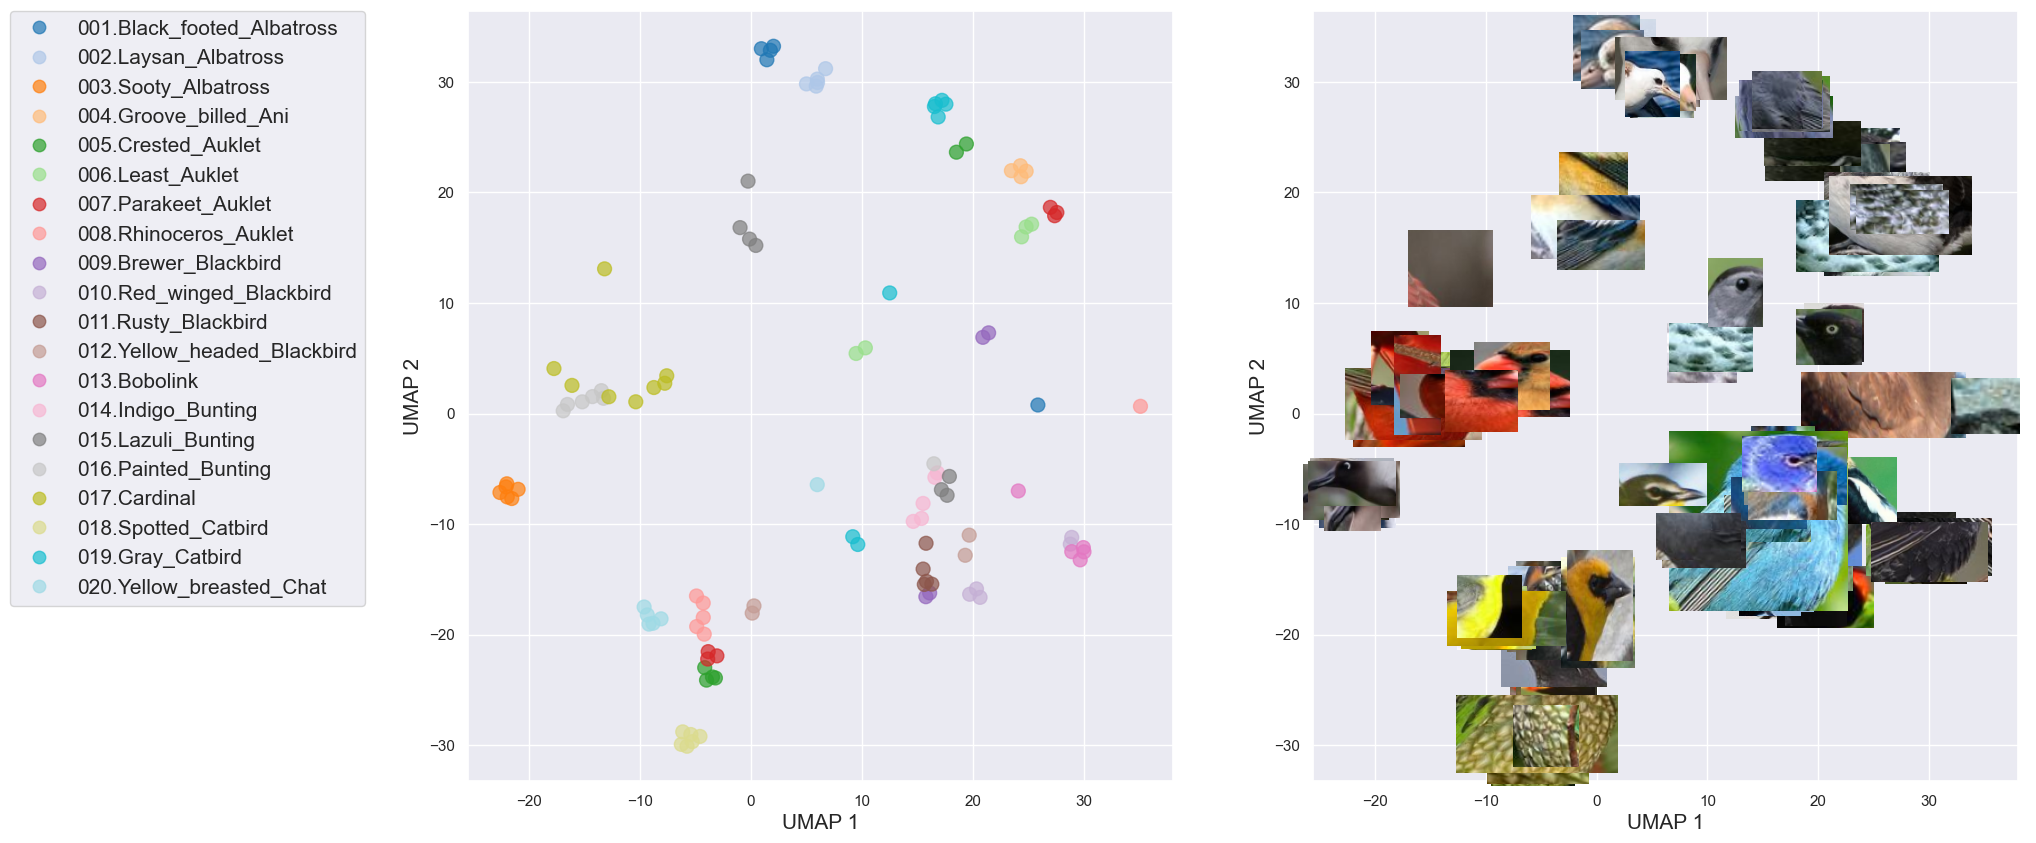

In [61]:
import torch
import os
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

# * load class info from file
base = "img/epoch-20/"
f2 = base + "bb20.npy" # --> Activation pattern
bb20 = np.load(f2) 


# * get class info and prepare coloring
path_to_class_info = "../Data/CUB_200_2011/CUB_200_2011/classes.txt"
class_names = pd.read_table(path_to_class_info, delimiter=" ",header=None).iloc[:,-1].to_list()
colors = bb20[:,-1]

# * set number of clasees that should be plotted
num_classes = 20
num = np.argwhere(colors==num_classes)[0][0]
colors = colors[:num]
labels = [class_names[el] for el in list(set(colors))]
print(colors)

# * load prototypes
os.chdir("../ProtoPNet")
path_to_model = "../Prototype Analysis/20_19_58prune0.9873.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).numpy()
os.chdir("../Prototype Analysis")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = umap.UMAP(n_neighbors=5,metric="euclidean", min_dist=2, spread=3, random_state=101)
embedding = reducer.fit_transform(prototypes)
xs = embedding[:num,0]
ys = embedding[:num,1]

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(1,2,figsize=(20,10))
#ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 20})
ax[0].set_xlabel("UMAP 1",{'fontsize': 15})
ax[0].set_ylabel("UMAP 2",{'fontsize': 15})
scatter = ax[0].scatter(xs, ys,c=colors,cmap="tab20", alpha=0.7, s=100)
handles, _ = scatter.legend_elements(num=len(labels))
lgnd = ax[0].legend(handles,labels, borderaxespad=0., fontsize=15, markerscale=1.5 ,bbox_to_anchor=(-.65, 1),loc='upper left')


# * Plot prototypes with corresponding images
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-20/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax[1].add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax[1].update_datalim(np.column_stack([xs, ys]))
ax[1].autoscale()

ax[1].set_xlabel("UMAP 1",{'fontsize': 15})
ax[1].set_ylabel("UMAP 2",{'fontsize': 15})



## PCA

[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  4  4  4  4
  4  4  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  9
  9  9  9  9 10 10 10 10 10 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17
 17 17 17 18 18 18 18 18 18 18 18 19 19 19 19 19 19]
(1023, 128)


Text(0, 0.5, 'Principal Component 2 (13.05%)')

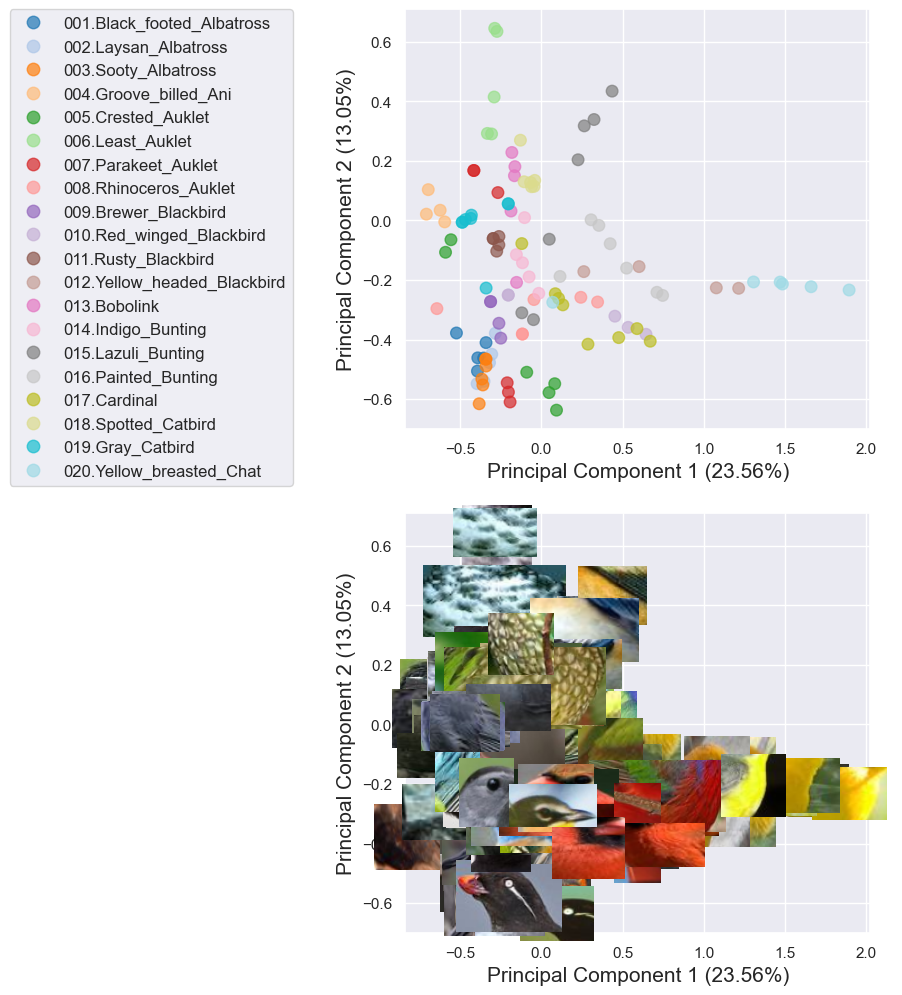

In [82]:
import torch
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

# * load class info from file
base = "img/epoch-20/"
f2 = base + "bb20.npy" # --> Activation pattern
bb20 = np.load(f2) 


# * get class info and prepare coloring
path_to_class_info = "../Data/CUB_200_2011/CUB_200_2011/classes.txt"
class_names = pd.read_table(path_to_class_info, delimiter=" ",header=None).iloc[:,-1].to_list()
colors = bb20[:,-1]

# * set number of clasees that should be plotted
num_classes = 20
num = np.argwhere(colors==num_classes)[0][0]
colors = colors[:num]
labels = [class_names[el] for el in list(set(colors))]
print(colors)

# * load prototypes
os.chdir("../ProtoPNet")
path_to_model = "../Prototype Analysis/20_19_58prune0.9873.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).numpy()
os.chdir("../Prototype Analysis")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = PCA()
embedding = reducer.fit_transform(prototypes)
xs = embedding[:num,0]
ys = embedding[:num,1]
ex_var = reducer.explained_variance_ratio_

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(2,1,figsize=(6,12))
#ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 20})
ax[0].set_xlabel(f"Principal Component 1 ({ex_var[0]*100:.2f}%)",{'fontsize': 15})
ax[0].set_ylabel(f"Principal Component 2 ({ex_var[1]*100:.2f}%)",{'fontsize': 15})
scatter = ax[0].scatter(xs, ys,c=colors,cmap="tab20", alpha=0.7, s=70)
handles, _ = scatter.legend_elements(num=len(labels))
lgnd = ax[0].legend(handles,labels,borderaxespad=0., fontsize=12, markerscale=1.5 ,bbox_to_anchor=(-.85, 1),loc='upper left')


# * Plot prototypes with corresponding images
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-20/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax[1].add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax[1].update_datalim(np.column_stack([xs, ys]))
ax[1].autoscale()

ax[1].set_xlabel(f"Principal Component 1 ({ex_var[0]*100:.2f}%)",{'fontsize': 15})
ax[1].set_ylabel(f"Principal Component 2 ({ex_var[1]*100:.2f}%)",{'fontsize': 15})




[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  4  4  4  4
  4  4  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  9
  9  9  9  9 10 10 10 10 10 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17
 17 17 17 18 18 18 18 18 18 18 18 19 19 19 19 19 19]
(1023, 128)


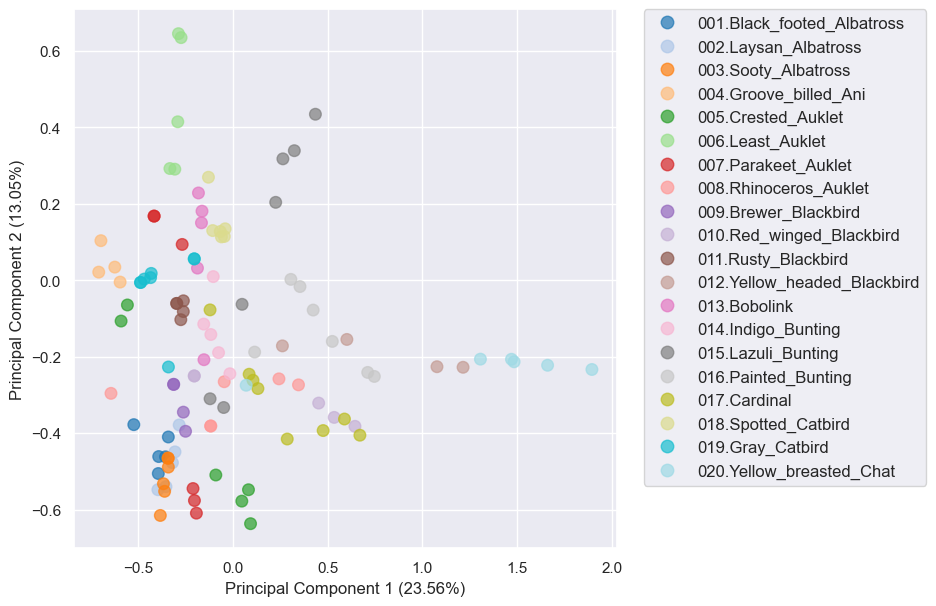

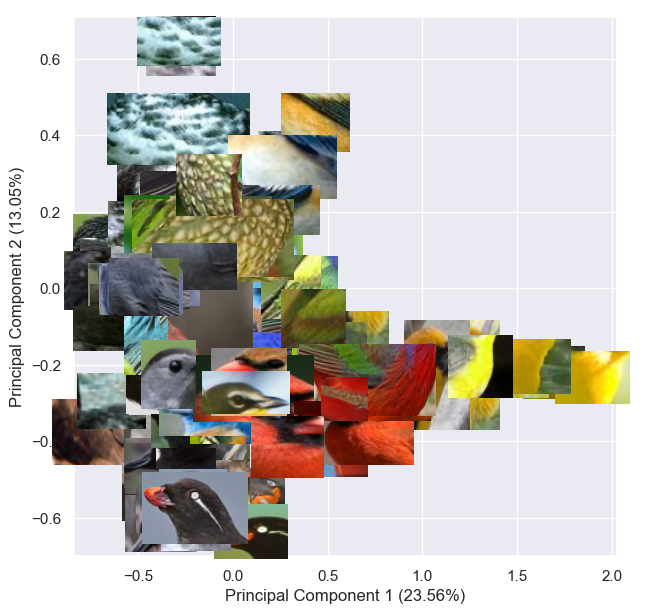

In [99]:
import torch
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

# * load class info from file
base = "img/epoch-20/"
f2 = base + "bb20.npy" # --> Activation pattern
bb20 = np.load(f2) 


# * get class info and prepare coloring
path_to_class_info = "../Data/CUB_200_2011/CUB_200_2011/classes.txt"
class_names = pd.read_table(path_to_class_info, delimiter=" ",header=None).iloc[:,-1].to_list()
colors = bb20[:,-1]

# * set number of clasees that should be plotted
num_classes = 20
num = np.argwhere(colors==num_classes)[0][0]
colors = colors[:num]
labels = [class_names[el] for el in list(set(colors))]
print(colors)

# * load prototypes
os.chdir("../ProtoPNet")
path_to_model = "../Prototype Analysis/20_19_58prune0.9873.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).numpy()
os.chdir("../Prototype Analysis")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = PCA()
embedding = reducer.fit_transform(prototypes)
xs = embedding[:num,0]
ys = embedding[:num,1]
ex_var = reducer.explained_variance_ratio_

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(1,1,figsize=(7,7))
#ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 20})
ax.set_xlabel(f"Principal Component 1 ({ex_var[0]*100:.2f}%)",{'fontsize': 12})
ax.set_ylabel(f"Principal Component 2 ({ex_var[1]*100:.2f}%)",{'fontsize': 12})
scatter = ax.scatter(xs, ys,c=colors,cmap="tab20", alpha=0.7, s=70)
handles, _ = scatter.legend_elements(num=len(labels))
lgnd = ax.legend(handles,labels,borderaxespad=0., fontsize=12, markerscale=1.5 ,bbox_to_anchor=(1.05, 1),loc='upper left')
plt.savefig("figures/PCA_birds.png",bbox_inches='tight')


# # * Plot prototypes with corresponding images
fig, ax = plt.subplots(1,1,figsize=(7,7))
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-20/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax.add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax.update_datalim(np.column_stack([xs, ys]))
ax.autoscale()

ax.set_xlabel(f"Principal Component 1 ({ex_var[0]*100:.2f}%)",{'fontsize': 12})
ax.set_ylabel(f"Principal Component 2 ({ex_var[1]*100:.2f}%)",{'fontsize': 12})

plt.savefig("figures/PCA_2_birds.png",bbox_inches='tight')




[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  4  4  4  4
  4  4  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  9
  9  9  9  9 10 10 10 10 10 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17
 17 17 17 18 18 18 18 18 18 18 18 19 19 19 19 19 19]
(1023, 128)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


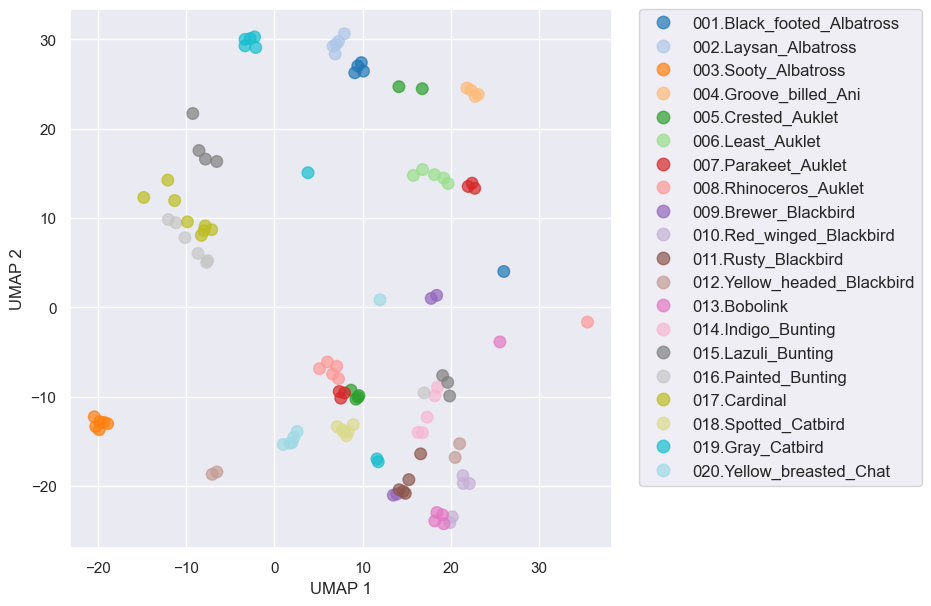

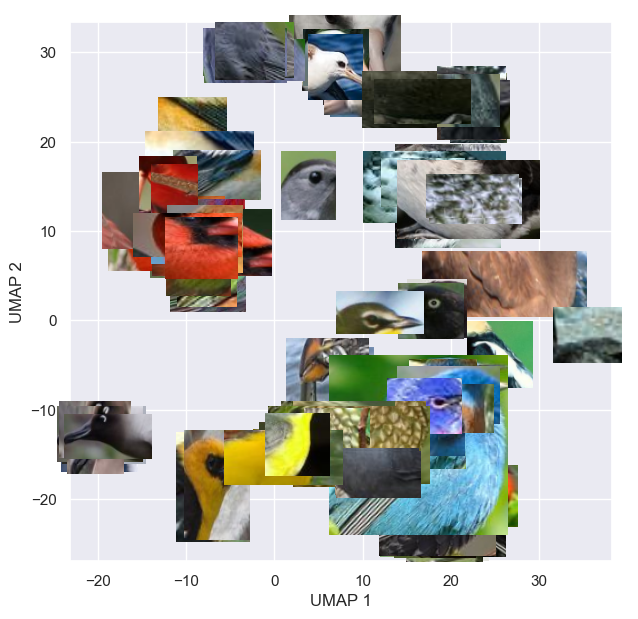

In [101]:
import torch
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

# * load class info from file
base = "img/epoch-20/"
f2 = base + "bb20.npy" # --> Activation pattern
bb20 = np.load(f2) 


# * get class info and prepare coloring
path_to_class_info = "../Data/CUB_200_2011/CUB_200_2011/classes.txt"
class_names = pd.read_table(path_to_class_info, delimiter=" ",header=None).iloc[:,-1].to_list()
colors = bb20[:,-1]

# * set number of clasees that should be plotted
num_classes = 20
num = np.argwhere(colors==num_classes)[0][0]
colors = colors[:num]
labels = [class_names[el] for el in list(set(colors))]
print(colors)

# * load prototypes
os.chdir("../ProtoPNet")
path_to_model = "../Prototype Analysis/20_19_58prune0.9873.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).numpy()
os.chdir("../Prototype Analysis")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = umap.UMAP(n_neighbors=5,metric="euclidean", min_dist=2, spread=3, random_state=101)
embedding = reducer.fit_transform(prototypes)
xs = embedding[:num,0]
ys = embedding[:num,1]

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(1,1,figsize=(7,7))
#ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 20})
ax.set_xlabel("UMAP 1",{'fontsize': 12})
ax.set_ylabel("UMAP 2",{'fontsize': 12})
scatter = ax.scatter(xs, ys,c=colors,cmap="tab20", alpha=0.7, s=70)
handles, _ = scatter.legend_elements(num=len(labels))
lgnd = ax.legend(handles,labels,borderaxespad=0., fontsize=12, markerscale=1.5 ,bbox_to_anchor=(1.05, 1),loc='upper left')
plt.savefig("figures/umap_birds.png",bbox_inches='tight')


# # * Plot prototypes with corresponding images
fig, ax = plt.subplots(1,1,figsize=(7,7))
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-20/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax.add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax.update_datalim(np.column_stack([xs, ys]))
ax.autoscale()

ax.set_xlabel("UMAP 1",{'fontsize': 12})
ax.set_ylabel("UMAP 2",{'fontsize': 12})

plt.savefig("figures/umap_2_birds.png",bbox_inches='tight')